# Домашнее задание № 3: Гравитационное поле Земли

Задание посвящено изучению общих особенностей гравитационного поля Земли. 

Основным документом, устанавливающим стандарты для всех, кто так или иначе связан с выводом или применением современных геоцентрических систем координат являются Конвенции [Международной службы вращения Земли и систем координат (IERS)](https://www.iers.org) 2010 года — IERS Conventions (2010) ([открыть PDF](https://iers-conventions.obspm.fr/content/tn36.pdf)). Значительная часть этого документа посвящена гравитационному полю Земли (Глава 6, [открыть PDF с последними обновлениями](https://iers-conventions.obspm.fr/content/chapter6/icc6.pdf)), но лишь в той степени, в которой это необходимо для читателей, занимающихся космической геодезией — доминирующим методом решения всех основных задач высшей геодезии, включая установление общеземных систем координат. Детальными вопросами изучения гравитационного поля Земли занимается физическая геодезия и гравиметрия. В этом задании мы коснёмся лишь самых основ.

In [1]:
# Делаем необходимые импорты пакетов
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

# Пакет для работы со сферическими функциями
import pyshtools as pysh
from pyshtools import constants

## Обучающие материалы I: продолжение знакомства с Python

- Строки: https://younglinux.info/python/string
- Файлы: https://younglinux.info/python/files
- Matplotlib:
    - https://cpp-python-nsu.inp.nsk.su/textbook/sec4/ch8
    - https://nagornyy.me/en/it/vizualizatsiia-dannykh-v-matplotlib/

## Обучающие материалы II: сферические функции

Изучение сферических функций входит в программу курса «Теория фигур планет и гравиметрия» (ТФПиГ). Поэтому здесь только в качестве справочной информации приводятся Jupyter Notebook по этой теме. Примечательно, что внутри них используется пакет [SymPy](https://docs.sympy.org) для символьных вычислений, с ним тоже можно познакомиться и больше не считать производные и интегралы вручную &#x1F600; или же проверять себя в особо сложных случаях. Материалы перечислены в порядке, в котором их рекомендуется изучать, глубину изучения выбирайте самостоятельно в объёме, необходимом для выполнения задания.

- [Уравнение Лапласа в сферических координатах](https://nbviewer.org/github/ioshchepkov/physical-geodesy-courses/blob/master/spherical_harmonics/01%20-%20%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0%20%D0%B2%20%D1%81%D1%84%D0%B5%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85%20%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D0%B0%D1%85.ipynb)
- [Решение уравнения Лапласа в сферических координатах](https://nbviewer.org/github/ioshchepkov/physical-geodesy-courses/blob/master/spherical_harmonics/02%20-%20%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0%20%D0%B2%20%D1%81%D1%84%D0%B5%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85%20%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D0%B0%D1%85.ipynb)
- [Полиномы и присоединённые функции Лежандра](https://nbviewer.org/github/ioshchepkov/physical-geodesy-courses/blob/master/spherical_harmonics/03%20-%20%D0%9F%D0%BE%D0%BB%D0%B8%D0%BD%D0%BE%D0%BC%D1%8B%20%D0%B8%20%D0%BF%D1%80%D0%B8%D1%81%D0%BE%D0%B5%D0%B4%D0%B8%D0%BD%D1%91%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20%D0%9B%D0%B5%D0%B6%D0%B0%D0%BD%D0%B4%D1%80%D0%B0.ipynb)
- [Сферические функции](https://nbviewer.org/github/ioshchepkov/physical-geodesy-courses/blob/master/spherical_harmonics/04%20-%20%D0%A1%D1%84%D0%B5%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8.ipynb)

## Гравитационное поле Земли

### Общие соотношения

Пусть дано произвольное объёмное тело (например, Земля) с переменной плотностью $\rho (x', y', z')$. Здесь координаты $(x', y', z')$ означают точку внутри объёма $v$ этого тела. Гравитационное поле объёмного тела в произвольной точке $(x, y, z)$ может быть полностью задано функцией потенциала
$$
V \left( x, y, z \right) = G \iiint\limits_v \dfrac{\rho (x', y', z')}{\sqrt{(x - x')^2 + (y - y')^2 + (z - z')^2}} dx' dy' dz',
$$
где интегрирование ведётся по всему объёму тела $v$. Здесь $G$ — гравитационная постоянная, $dv = dx' dy'dz'$ — элемент объёма тела с плотностью $\rho (x', y', z')$.  Для расстояния $\sqrt{(x - x')^2 + (y - y')^2 + (z - z')^2} \to\infty$ потенциал сначала вырождается в потенциал материальной точки 
$$
V = \frac{GM}{\sqrt{(x - x_0)^2 + (y - y_0)^2 + (z - z_0)^2}},
$$
расположенной в центре масс объёмного тела $(x_0, y_0, z_0)$ с массой $M$, равной массе тела, а затем уже, очевидно, обращается в 0. Причём, символ $\infty$ с физической точки зрения здесь очень условный и интерпретируется в зависимости от задач и требуемой точности.

Если всё объёмное тело вращается с угловой скоростью $\omega$ и точка $(x, y, z)$ это делает вместе с ним, то в последней возникает центробежная сила, потенциал которой 
$$
Q \left(x, y \right) = \dfrac{1}{2} \omega^2 \left( x^2 + y^2 \right).
$$
Здесь очевидно, что $d = \sqrt{x^2 + y^2}$ является расстоянием до оси вращения, $z$ — в случае Земли.

Таким образом, потенциал $W$, связанный с вращающейся Землей (например, во вращающейся системе координат, фиксированной с Землёй), представляет собой сумму потенциала притяжения $V$ и центробежного потенциала $Q$, то есть
$$
W = V + Q.
$$
Потенциал $V$ обычно называют **потенциалом притяжения (силы притяжения)**, а потенциал $W$ — **потенциалом тяжести (силы тяжести)**.

С обоими потенциалами связана векторная величина — сила. В случае потенциала $V$ это **сила притяжения**, вызванная исключительно с действием гравитации, а в случае потенциала $W$ это **сила тяжести** $\vec{g}$, уже включающая и центробежную силу. Сила тяжести является основной силой, формирующей фигуру Земли.

По определению, сила (притяжения, тяжести, центробежная...) является [градиентом](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82) потенциала (притяжения, тяжести, центробежного...). Таким образом, найдя градиент потенциала по координатам, можно получить составляющие вектора силы. Для силы и потенциала тяжести записываем
$$
\vec{g} = \textrm{grad} W = \sqrt{
\left( \dfrac{\partial W}{\partial x} \right)^2 +
\left( \dfrac{\partial W}{\partial y} \right)^2 +
\left( \dfrac{\partial W}{\partial z} \right)^2}.
$$

Величина этого вектора находится как обычно
$$
g = \left| \textrm{grad} W \right|,
$$
именно она обычно подлежит непосредственному измерению в гравиметрии.

В сферических координатах приближённо можно считать
$$
g (r, \phi, \lambda) = \left| \textrm{grad} W (r, \phi, \lambda) \right| \approx 
\left| \dfrac{\partial W (r, \phi, \lambda))}{\partial r} \right| = 
\left| \dfrac{\partial V (r, \phi, \lambda))}{\partial r} + 
\dfrac{\partial Q (r, \phi))}{\partial r}
\right| = \left| V_r + Q_r \right|,
$$
поскольку основной по величине частью вектора силы тяжести является именно радиальная составляющая. Иначе говоря, потенциал и сила тяжести быстрее всего изменяются именно с высотой.

Геометрически потенциал описывается и может быть представлен в виде семейства уровенных поверхностей, а сила — векторами и силовыми линиями. Уровенная (или эквипотенциальная) поверхность представляет собой поверхность равного потенциала
$$
W (x, y, z) = \textrm{const}.
$$
Векторы силы тяжести всюду перпендикулярны уровенным поверхностям и являются касательными к силовым линиям, пронизывающим перпендикулярно уровенные поверхности. Уровенных поверхностей, силовых линий и векторов силы существует бесконечное множества для всякого объёмного тела.

Для Земли среди всей бесконечности уровенных поверхностей часто и традиционно выбирают одну с каким-либо образом определённым или заданным потенциалом $W_0$ и называют её геоидом, являющимся некоторой аппроксимацией реальной фигуры Земли. В самом распространённом определении, поверхность геоида аппроксимирует (но не совпадает!) средний уровень Мирового океана.

**Задание.** Написать функции для вычисления потенциала и силы притяжения материальной точки (ТФПиГ: сферы и шара во внешней точке) и построить график изменения этих величин при удалении от материальной точки на расстояние 5 радиусов Земли. Массу точки $M$ принять равной массе Земли, что эквивалентно использованию соответствующей величины геоцентрической гравитационной постоянной $GM$.

In [2]:
def gravitational_potential_point():
    ...

def gravitation_point():
    ...

In [3]:
# графики здесь

**Задание**. Пользуясь формулами связи сферических и прямоугольных координат, вывести выражение для центробежного потенциала и силы в сферических координатах, написать функцию для их вычисления и построить графики изменения центробежного потенциала и силы с широтой на Земле. Центробежную силу сначала получить в прямоугольных координатах через связь потенциала и силы, а затем уже преобразовать в сферические.

In [4]:
# Угловая скорость вращения Земли
omega = constants.Earth.wgs84.omega.value

In [5]:
def centrifugal_potential_sph():
    ...

def centrifugal_force_sph():
    ...

In [6]:
# графики здесь

**Задание.** Оценить (с помощью кода на Python), какой относительный по величине вклад в потенциал силы тяжести Земли вносит потенциал центробежной силы.

In [7]:
# здесь оценка вклада

### Представление в виде ряда
Стандартным (но не самым точным!) способом представления потенциала притяжения $V$ в точке со сферическими 
координатами $(r, \phi, \lambda)$ является разложение в ограниченный до максимальной степени $N$ ряд по шаровым (объёмным сферическим) функциям вида
$$
V (r, \phi, \lambda) = \dfrac{GM}{r}
\sum\limits_{n=0}^N \left( \dfrac{a_e}{r} \right)^n
\sum\limits_{m=0}^n \left[
\bar{C}_{nm} \cos{(m\lambda)} + \bar{S}_{nm} \sin{(m\lambda)}
\right] \bar{P}_{nm} (\sin{\phi}),\quad n \geq m,
$$
где $n$ и $m$ — степень и порядок, 
$\bar{C}_{nm}, \bar{S}_{nm}$ — полностью нормированные коэффициенты разложения, 
$\bar{P}_{nm}\left( \sin{\phi} \right)$ — полностью нормированные присоединённые функции Лежандра,
$GM$ — геоцентрическая гравитационная постоянная,
$a_e$ — линейный масштабный коэффициент, часто выбираемый близким к размеру большой полуоси земного эллипсоида. Последние две константы всего лишь играют роль масштабирующих коэффициентов, они не обязательно должны совпадать с текущими наилучшими оценками этих величин.

Полностью ($4\pi$, геодезически) нормированные  присоединённые функции Лежандра $\bar{P}_{nm} \left( \sin\phi \right)$ связаны с ненормированными присоединёнными функциями Лежандра $P_{nm} \left( \sin\phi \right)$ через нормирующий множитель $N_n^m$ таким образом
\begin{align}
\bar{P}_{nm} \left( \sin\phi \right) =
N_n^m P_{nm} \left( \sin\phi \right),\qquad
N_n^m = \sqrt{(2 - \delta) (2n + 1) \dfrac{(n-m)!}{(n+m)!}},\qquad
\delta = 
\begin{cases}
1, & m = 0,\\
0, & m \neq 0. 
\end{cases}
\end{align}

**Задание.** Модифицируйте функцию из обучающих материалов для вычисления нормирующего множителя для численных расчётов с пакетом NumPy:

In [8]:
def normalizing_factor(n, m):
    ...

**Задание.** Модифицируйте функцию из обучающих материалов для вычисления присоединенных функций Лежандра таким образом, чтобы стало возможно при необходимости (с аргументом `normalized=True`) вычислить полностью нормированные присоединённые функции Лежандра, вызывая функцию `normalizing_factor`. Возможность вычисления ненормированных функций Лежандра также должна остаться (с аргументом `normalized=False`). Также оставить входным аргумент $t=\sin\phi$.

In [9]:
def lpnm(n, m, t, normalized=True):
    ...

Аналогично, полностью нормированные (безразмерные) коэффициенты разложения потенциала притяжения $(\bar{C}_{nm}, \bar{S}_{nm})$ связаны с ненормированными (безразмерными) коэффициентами $(C_{nm}, S_{nm})$ так
$$
\bar{C}_{nm} = N_n^m C_{nm}, \qquad \bar{S}_{nm} = N_n^m S_{nm}.
$$
Мы оставляем за рамками нашего курса вопрос о том, как именно определяются коэффициенты $(\bar{C}_{nm}, \bar{S}_{nm})$. Это крайне интересная, но вместе с тем и довольно сложная задача современной физической геодезии. Однако надо чётко понимать, что определяются они из реальных наземных и спутниковых гравиметрических данных (измерений), полученных по всей Земле. Необходимое глобальное разрешение (шаг) $\psi$ таких исходных данных будет тем больше, чем большая максимальная степень разложения $N$ запланирована. Приближённое соотношение такое:
$$
\psi^{\circ} = \dfrac{180^\circ}{N}.
$$
**Задание.** Например, при $N=180$, получаем $\psi = 1^\circ \approx 111$ км, а при $N=2190$ получаем уже

In [10]:
# Вычислить psi в км, округлить до целых, вывести результат с указанием размерности

Существует множество различных моделей гравитационного поля Земли. Полный список открытых моделей доступен на сайте [ICGEM](http://icgem.gfz-potsdam.de/tom_longtime). 

Конвенциальной моделью является EGM2008, выведенная до максимальной степени разложения $N=2190$. В таблице 6.1 Конвенций можно заметить, что рекомендуемая максимальная степень разложения заметно меньше и зависит от приложения, то есть от требуемой точности и детальности. Как видно из формулы для $V$, влияние отдельных степеней $n$ в разложении уменьшается с высотой пропорционально $1 / r^{n+1}$. С физической точки зрения это означает, что поле становится проще, детали, заметные на поверхности Земли, сглаживаются и становятся неуловимыми при удалении. В пределе, как уже упоминалось выше, на достаточном расстоянии от планеты, её гравитационное поле можно вообще считать эквивалентным притяжению точечной массы, однако в геодезических задачах такое встречается редко, зато актуально для задач небесной механики.

Для работы с моделью EGM2008 в Python мы воспользуемся сторонним пакетом [pyshtools](https://shtools.github.io/SHTOOLS/index.html), который уже импортировали в самом начале. В нём уже реализована функция ([исходный код](https://github.com/SHTOOLS/SHTOOLS/blob/master/pyshtools/shio/icgem.py)) чтения файла коэффициентов модели.  Итак прописываем путь до файла модели и считываем его с помощью функции `read_icgem_gfc` до максимальной степени $N=30$ (единая на всё задание):

In [11]:
model_path = 'PATH/TO/EGM2008.gfc'

In [12]:
nmax = 30

In [13]:
coeffs, gm, a = pysh.shio.read_icgem_gfc(model_path, lmax=nmax)

Функция возвращает массив NumPy с полностью нормированными безразмерными коэффициентами $\bar{C}_{nm}$ и $\bar{S}_{nm}$ до степени $N$, значение $GM$ и $a_e$ в единицах СИ. Ранг (размерность) массива коэффициентов узнаём командой

In [14]:
coeffs.shape

(2, 31, 31)

То есть это можно рассматривать как массив, содержащий 2 массива ($\bar{C}_{nm}$ и $\bar{S}_{nm}$), каждый размерностью 13$\times$13. В строках этих двух массивов записаны коэффициенты, отнесённые к одной степени $n$, в столбцах — отнесённые к одному порядку $m$.  Для примера, извлекаем коэффициент $\bar{C}_{2,1}$ второй степени $n=2$ и первого порядка $m=1$, получаем

In [15]:
coeffs[0,2,1]

-2.06615509074176e-10

Или все коэффициенты степени $n=2$:

In [16]:
coeffs[:,2,:]

array([[-4.84165144e-04, -2.06615509e-10,  2.43938357e-06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.38441389e-09, -1.40027370e-06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

Конвенциальная модель EGM2008 отличается от исходной модели EGM2008 тем, что в ней заменены значения некоторых коэффициентов первых степеней на уточнённые, полученные по большему числу измерительных данных. Мы пока эти детали опустим и будем работать с оригинальной моделью. Теперь можно переходить к вычислениям.

### Вычисление по глобальной модели гравитационного поля Земли

Сила тяжести в сферическом приближении равна
$$
g (r, \phi, \lambda) \approx \left| V_r + Q_r \right|,
$$
где за $V_r$ и $Q_r$ обозначены радиальные производные потенциала силы притяжения и центробежной силы соответственно. Для $V_r$ находим производную
$$
V_r (r, \phi, \lambda) = -\dfrac{GM}{r^2}
\sum\limits_{n=0}^N \left( \dfrac{a_e}{r} \right)^n \left( n + 1 \right)
\sum\limits_{m=0}^n \left[
\bar{C}_{nm} \cos{(m\lambda)} + \bar{S}_{nm} \sin{(m\lambda)}
\right] \bar{P}_{nm} (\sin{\phi}).
$$
Для радиальной производной центробежной силы выражение легко получить из ранее полученной формулы для потенциала $Q$ в сферических координатах.

**Задание.** Написать функцию для вычисления силы и потенциала притяжения и тяжести по глобальной модели гравитационного поля Земли. Функция должна возвращать значение потенциала и силы. Если угловая скорость вращения $\omega$ не задана (аргумент `omega=None`), то вычисляются величины поля притяжения, если задана, то поля тяжести.

Внимание: с учётом уже возрастающей сложности вычислений не только для вас, но и для машины, стоит избегать избыточных вычислений и повторений, особенно внутри циклов. В общем, стоит стараться оптимизировать свои алгоритмы.

In [17]:
def global_gravity_model(r, latitude, longitude, coeffs, gm, a, omega=None):
    ...
    # узнаём максимальную степень
    nmax = coeffs.shape[1]-1
    ...
    # первая сумма (n от 0 до nmax)
    for n in range(nmax + 1):
        ...
        # вторая сумма (m от 0 до n)
        for m in range(n + 1):
            ...

**Задание.** Вычислить значение силы и потенциала притяжения и тяжести по глобальной модели EGM2008 в точке на территории университета (прямоугольные координаты взять из Лекции № 2), а также в 9-х других произвольно выбранных  точках на физической поверхности Земли. Выбрать точки максимально разнородные по географическому положению (суша / океан, равнина / горы, разные полушария, ближе к экватору / ближе к полюсу). При недоступности информации о высотах, снять их с открытых топографических карт [OpenTopoMap](https://opentopomap.org). Результаты проанализировать.

In [18]:
# Координаты и высоты точек
lons = [32.5, 43.0, -45.3, -100.0]
lats = [56.7, 23.7, -32.4, 45.5]
heights = [120, 34, 25, 300]

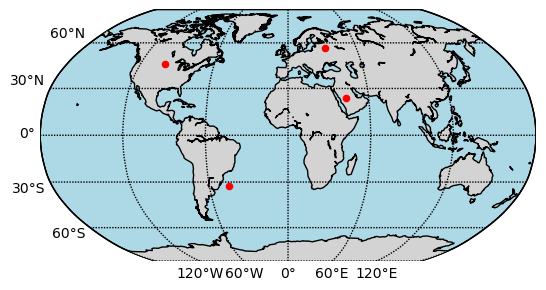

In [19]:
# Нанести выбранные точки на карту
from mpl_toolkits.basemap import Basemap

map = Basemap(projection='robin', lon_0=0)
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30), labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='lightgray', lake_color='lightblue')

map.scatter(lons, lats, 20, latlon=True, marker='o', color='red')
plt.show()

In [20]:
# результаты вычисления здесь

### Анализ результатов вычислений

Здесь текст анализа...